## Prediction using ARIMA model

c:\Users\snehal\AppData\Local\Programs\Python\Python313\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
c:\Users\snehal\AppData\Local\Programs\Python\Python313\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
c:\Users\snehal\AppData\Local\Programs\Python\Python313\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
c:\Users\snehal\AppData\Local\Programs\Python\Python313\Lib\site-packages\statsmodels\tsa\statespace\sarimax.py:966: UserWarning: Non-stationary sta

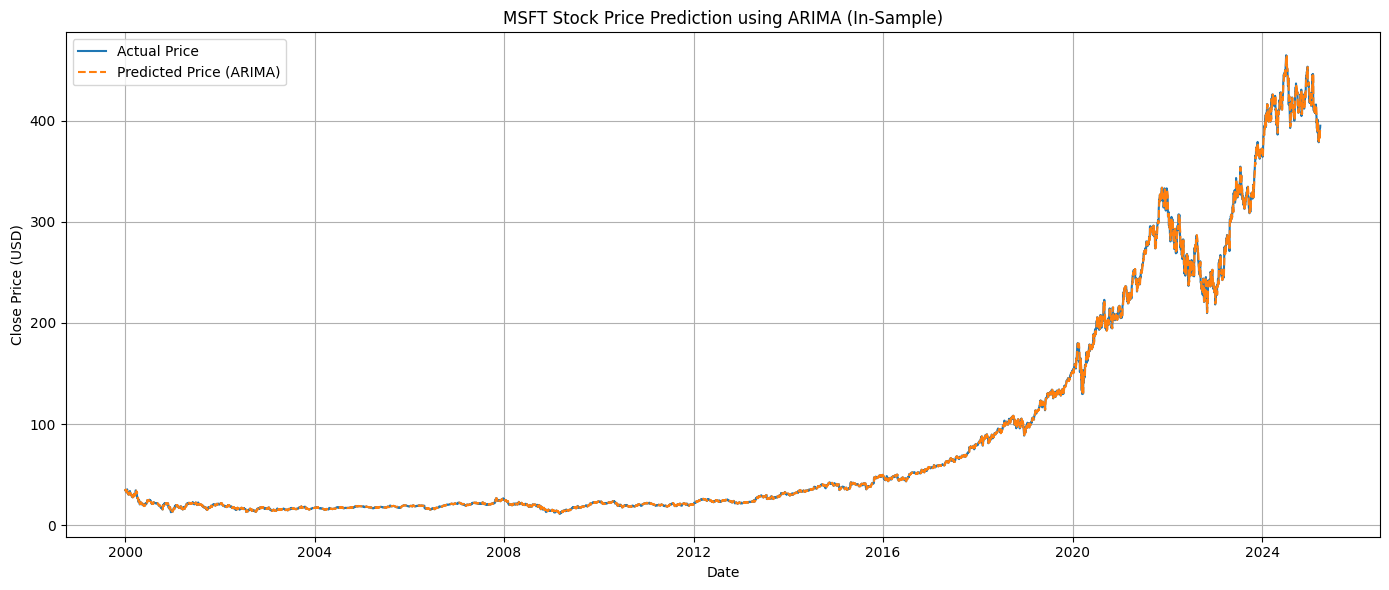

RMSE: 2.30


In [1]:
import pandas as pd
import matplotlib.pyplot as plt
from statsmodels.tsa.arima.model import ARIMA
from sklearn.metrics import mean_squared_error
import numpy as np
import math

# --- 1. Load historical data from CSV ---
file_path = r"D:\My Projects_BU_Snehal\Time-Series-Model\MSFT_Historical_Data.csv"
df = pd.read_csv(file_path, parse_dates=['Date'])
df = df[['Date', 'Close']].dropna()
df.set_index('Date', inplace=True)

# --- 2. Prepare the series ---
series = df['Close']

# --- 3. Fit ARIMA Model (manual order or tune it) ---
model = ARIMA(series, order=(5, 1, 2))  # You can experiment with (p,d,q)
model_fit = model.fit()

# --- 4. Predict in-sample ---
predicted = model_fit.predict(start=1, end=len(series)-1, typ='levels')

# Align with actual values
actual = series[1:]
predicted = pd.Series(predicted, index=actual.index)

# --- 5. Plot Actual vs Predicted ---
plt.figure(figsize=(14, 6))
plt.plot(actual, label='Actual Price')
plt.plot(predicted, label='Predicted Price (ARIMA)', linestyle='--')
plt.title("MSFT Stock Price Prediction using ARIMA (In-Sample)")
plt.xlabel("Date")
plt.ylabel("Close Price (USD)")
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()

# --- 6. Calculate RMSE ---
rmse = math.sqrt(mean_squared_error(actual, predicted))
print(f"RMSE: {rmse:.2f}")


Forecasting using ARIMA

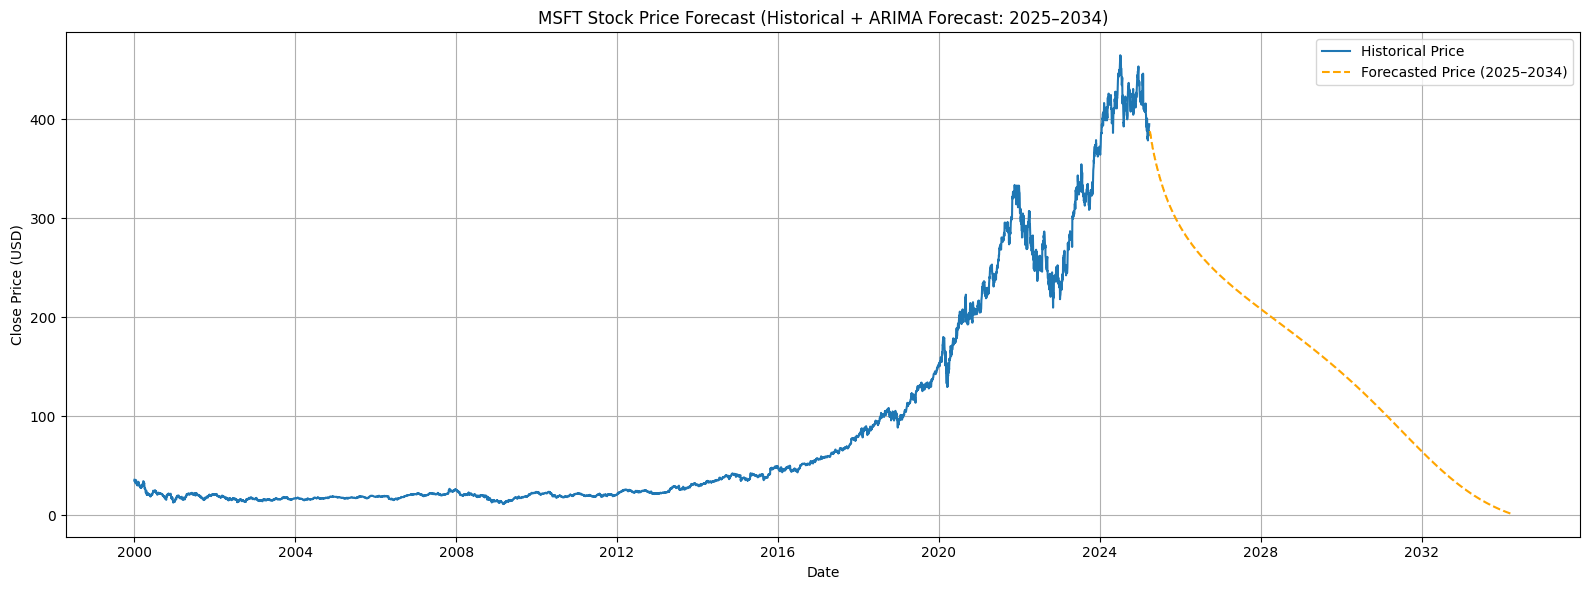

In [3]:
import pandas as pd
import matplotlib.pyplot as plt

# --- 1. Load Forecasted Data ---
forecast_path = r"D:\My Projects_BU_Snehal\Time-Series-Model\MSFT_Prediction_2025_to_2034.csv"
forecast_df = pd.read_csv(forecast_path, parse_dates=['Date'])
forecast_df.set_index('Date', inplace=True)

# Automatically detect the forecast column
forecast_col = forecast_df.columns[0]

# --- 2. Load Historical Data ---
history_path = r"D:\My Projects_BU_Snehal\Time-Series-Model\MSFT_Historical_Data.csv"
historical_df = pd.read_csv(history_path, parse_dates=['Date'])
historical_df.set_index('Date', inplace=True)
historical_df = historical_df[['Close']]

# --- 3. Combine for full view (Optional) ---
# Rename forecast column to match for consistent plotting
forecast_df_renamed = forecast_df.rename(columns={forecast_col: 'Forecasted_Close'})
combined_df = pd.concat([historical_df, forecast_df_renamed])

# --- 4. Plot Historical + Forecasted Data ---
plt.figure(figsize=(16, 6))
plt.plot(historical_df['Close'], label='Historical Price')
plt.plot(forecast_df_renamed['Forecasted_Close'], label='Forecasted Price (2025–2034)', linestyle='--', color='orange')
plt.title("MSFT Stock Price Forecast (Historical + ARIMA Forecast: 2025–2034)")
plt.xlabel("Date")
plt.ylabel("Close Price (USD)")
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()